# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |  Santiago Padilla Arias |
| **Fecha**      |   01/10/2024 |
| **Expediente** |   750985 | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [48]:
import pandas as pd
datos=pd.read_csv("Default.csv")
datos

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [53]:
datos.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [58]:
datos.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

Son datos del tipo numerico en este caso son las columnas income y balance 

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [66]:
datos["default"] = datos["default"].astype("category")
datos["default"]

0       No
1       No
2       No
3       No
4       No
        ..
9995    No
9996    No
9997    No
9998    No
9999    No
Name: default, Length: 10000, dtype: category
Categories (2, object): ['No', 'Yes']

In [68]:
datos["student"] = datos["student"].astype("category")
datos["student"]

0        No
1       Yes
2        No
3        No
4        No
       ... 
9995     No
9996     No
9997     No
9998     No
9999    Yes
Name: student, Length: 10000, dtype: category
Categories (2, object): ['No', 'Yes']

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

Text(0, 0.5, 'Income')

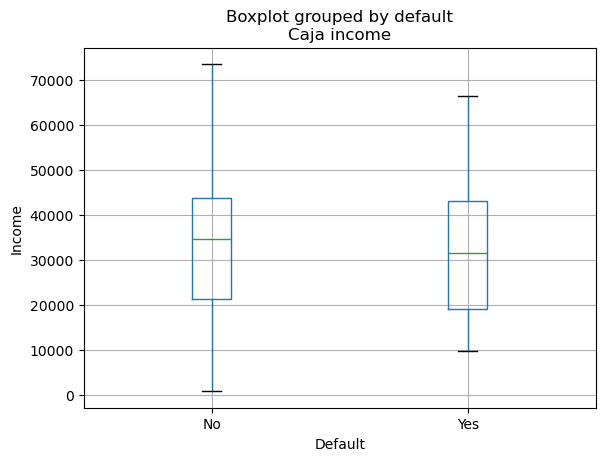

In [73]:
import matplotlib.pyplot as plt
datos.boxplot(column="income", by="default")
plt.title("Caja income")
plt.xlabel("Default")
plt.ylabel("Income")

Text(0, 0.5, 'Income')

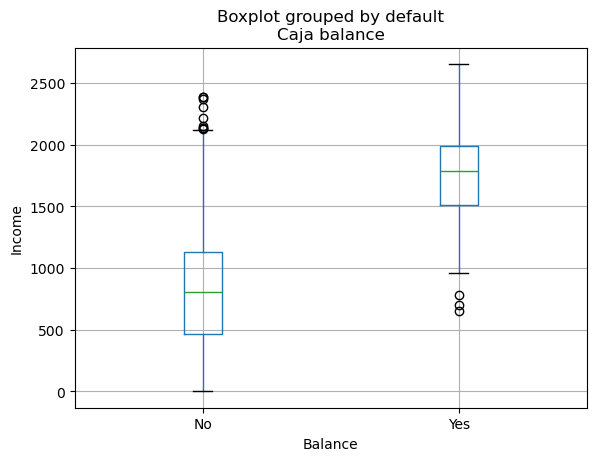

In [75]:
import matplotlib.pyplot as plt
datos.boxplot(column="balance", by="default")
plt.title("Caja balance")
plt.xlabel("Balance")
plt.ylabel("Income")

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

Text(0, 0.5, 'Income')

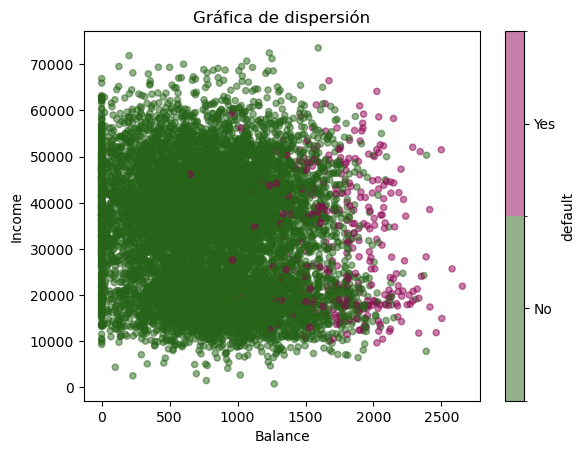

In [79]:
datos.plot.scatter(x="balance", y="income", c="default", colormap="PiYG_r", alpha=0.5)
plt.title("Gráfica de dispersión")
plt.xlabel("Balance")
plt.ylabel("Income")

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [87]:
y=datos["default"]=="Yes"
x=datos["balance"]
x

0        729.526495
1        817.180407
2       1073.549164
3        529.250605
4        785.655883
           ...     
9995     711.555020
9996     757.962918
9997     845.411989
9998    1569.009053
9999     200.922183
Name: balance, Length: 10000, dtype: float64

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

Text(0, 0.5, 'Default')

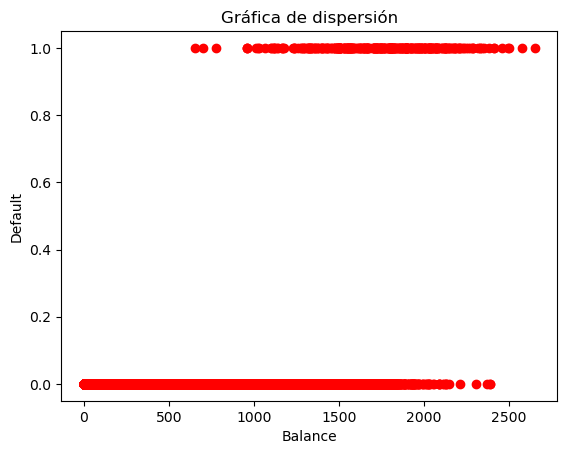

In [285]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y,c="r")
plt.title("Gráfica de dispersión")
plt.xlabel("Balance")
plt.ylabel("Default")

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo. Utiliza $\beta_0=-10$ y $\beta_1=0.005$ como valores iniciales.

In [311]:
import scipy.optimize as opt
import numpy as np

n=len(y)
ones=np.ones([n, 1])
balance=np.reshape(datos["balance"], [n, 1])
X=np.hstack((ones, balance))
y_v=np.reshape(y, [n, 1])

In [313]:
def predi(b,X):
    return 1/(1+np.exp(-X@b))

In [315]:
def J(b, X, y):
    epsilon=1e-45
    n, p=X.shape
    b=np.reshape(b,[p, 1])
    y_pred=predi(b, X)
    e=y*np.log(y_pred+epsilon)+(1-y)*np.log(1-y_pred+epsilon)
    return -np.sum(e)

In [317]:
b1=-10
b2=-0.0005
b=[b1,b2]
rrs=opt.minimize(J, b, args=(X, y_v))
rrs

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 798.2258422360521
        x: [-1.065e+01  5.499e-03]
      nit: 13
      jac: [ 0.000e+00  7.629e-06]
 hess_inv: [[ 2.280e-06 -1.312e-09]
            [-1.312e-09  1.715e-09]]
     nfev: 102
     njev: 34

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [238]:
p = predi(rrs.x,X)
p

array([1.30592143e-03, 2.11294683e-03, 8.59570272e-03, ...,
       2.46690908e-03, 1.16760495e-01, 7.14687008e-05])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [155]:
p_p2=p*(1-p)
p_p2

array([1.30421600e-03, 2.10848229e-03, 8.52181662e-03, ...,
       2.46082344e-03, 1.03127481e-01, 7.14635930e-05])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [410]:
V = np.diagflat(p*(1-p))
V

array([[1.30421600e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10848229e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52181662e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46082344e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03127481e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14635930e-05]])

In [408]:
V = np.diagflat(p_p2)
V

array([[1.30421600e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10848229e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52181662e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46082344e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03127481e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14635930e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [164]:
cov = np.linalg.inv(X.T @ V @ X)
cov

array([[ 1.30430885e-01, -7.81688634e-05],
       [-7.81688634e-05,  4.85616677e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [168]:
se = np.sqrt(np.diag(cov))
se

array([3.61152163e-01, 2.20367120e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [172]:
z_statistic=rrs.x/se
z_statistic

array([-29.49170083,  24.95248051])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [177]:
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(z_statistic)))
p_value

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Los valores tienden o se acercan mucho a cero. Esto nos indica que los factores si tienen relación con la respuesta.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [366]:
# 1. Transforma el factor de {"Yes", "No"} a {1, 0}.
y2=datos["default"]=="Yes"
X2=datos["balance"]
datos['default2'] = datos['default'].map({'Yes': 1, 'No': 0})
datos['student2'] = datos['student'].map({'Yes': 1, 'No': 0})

In [400]:
# 2. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.
import scipy.optimize as opt
import numpy as np

n2=len(y2)
ones2=np.ones([n2, 1])
student=np.reshape(datos["student2"], [n2, 1])
X2=np.hstack((ones2, student))
y_v2=np.reshape(y2, [n2, 1])
def predi2(b2,X2):
    return 1/(1+np.exp(-X2@b2))
def J2(b2, X2, y2):
    epsilon2=1e-10
    n2, p2=X2.shape
    b2=np.reshape(b2,[p2, 1])
    y_pred2=predi2(b2, X2)
    e2=y2*np.log(y_pred2+epsilon2)+(1-y2)*np.log(1-y_pred2+epsilon2)
    return -np.sum(e2)
b0=-3.5
b1=0.4
b2=[b0,b1]
rrs2=opt.minimize(J2, b2, args=(X2, y_v2))
rrs2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1454.341529987519
        x: [-3.504e+00  4.049e-01]
      nit: 6
      jac: [ 7.629e-05 -1.526e-05]
 hess_inv: [[ 7.010e-12  9.628e-11]
            [ 9.628e-11  3.792e-01]]
     nfev: 48
     njev: 16

In [402]:
# 3. Calcula el error estándar de tus estimaciones.

#   1. Usa tu modelo para encontrar $\hat{p}(X)$
p2= predi2(rrs2.x,X2)
p2

array([0.02919501, 0.04313859, 0.02919501, ..., 0.02919501, 0.02919501,
       0.04313859])

In [404]:
#   2. Calcula el error $p(1-p)$
p_p2_2=p2*(1-p2)
p_p2_2

array([0.02834266, 0.04127765, 0.02834266, ..., 0.02834266, 0.02834266,
       0.04127765])

In [424]:
#   3. Calcula la matriz de covarianza
V2 = np.diagflat(p2*(1-p2))
V2

array([[0.02834266, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04127765, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02834266, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02834266, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02834266,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04127765]])

In [420]:
cov2 = np.linalg.inv(X2.T @ V2 @ X2)
cov2

array([[ 0.00500035, -0.00500035],
       [-0.00500035,  0.01322936]])

In [342]:
#   4. Extrae el error estándar

In [426]:
se2 = np.sqrt(np.diag(cov2))
se2

array([0.07071318, 0.11501894])

In [435]:
# 5. Argumenta si los factores son significativos utilizando el *p-value*.
#   1. Utiliza el error estándar para calcular el estadístico *z*
z_statistic2=rrs2.x/se2
z_statistic2

array([-49.55409497,   3.52017669])

In [437]:
#   2. Calcula el *p-value*
#   3. ¿Son significativos?
from scipy.stats import norm

p_value2 = 2 * (1 - norm.cdf(abs(z_statistic2)))
p_value2

array([0.        , 0.00043126])

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `minimize` para estimar los coeficientes. Utiliza los siguientes valores como punto de partida:
   - $\beta_0 = -10$
   - $\beta_1 = 0.005$
   - $\beta_2 = 0.003$
   - $\beta_3 = -0.65$
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [484]:
# Definir variables
y_vec = datos["default"] == "Yes"
bal = np.reshape(datos["balance"], [n, 1])
inc = np.reshape(datos["income"] / 1000, [n, 1])  # Normalizando el ingreso
stu = np.reshape((datos["student"] == "Yes"), [n, 1])
ones = np.ones((n, 1))  # Crear una columna de unos

# Crear matriz X_T
X_T = np.hstack((ones, bal, inc, stu))

# Definir función de predicción
def pred_3(b_3, X_T): 
    return 1 / (1 + np.exp(-X_T @ b_3))

# Definir función de costo
def J_3(b_3, X_T, y): 
    epsilon = 1e-45
    n, p3 = X_T.shape
    b = np.reshape(b_3, [p3, 1])
    y_pred3 = pred_3(b_3, X_T)
    e = y * np.log(y_pred3 + epsilon) + (1 - y) * np.log(1 - y_pred3 + epsilon)
    return -np.sum(e)

# Coeficientes iniciales
b3 = [-10, 0.005, 0.003, -0.65]

# Minimizar la función de costo
rr3 = opt.minimize(J_3, b3, args=(X_T, y_vec))
rr3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 785.7724143209932
        x: [-1.087e+01  5.736e-03  3.033e-03 -6.467e-01]
      nit: 10
      jac: [ 7.629e-06  7.324e-04  7.629e-05  1.526e-05]
 hess_inv: [[ 6.284e+00 -5.840e-04 -1.330e-01 -3.076e+00]
            [-5.840e-04  6.326e-08  1.197e-05  2.861e-04]
            [-1.330e-01  1.197e-05  2.836e-03  6.509e-02]
            [-3.076e+00  2.861e-04  6.509e-02  1.506e+00]]
     nfev: 140
     njev: 28

In [506]:
# Predicciones
pre_3 = pred_3(rr3.x, X_T)
pre_3

array([1.42899426e-03, 1.12243776e-03, 9.81334028e-03, ...,
       2.89664162e-03, 1.47142974e-01, 3.32399175e-05])

In [508]:
# Probabilidad ajustada
p_3 = pre_3 * (1 - pre_3)   
p_3

array([1.42695223e-03, 1.12117789e-03, 9.71703863e-03, ...,
       2.88825109e-03, 1.25491919e-01, 3.32388126e-05])

In [510]:
# Matriz diagonal de varianza
V3 = np.diagflat(p_3)
V3

array([[1.42695223e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.12117789e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.71703863e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.88825109e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.25491919e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.32388126e-05]])

In [512]:
# Calcular la matriz de covarianza
cov_3 = np.linalg.inv(X_T.T @ V3 @ X_T)
cov_3

array([[ 2.42316385e-01, -8.22305118e-05, -2.67077987e-03,
        -5.32026004e-02],
       [-8.22305118e-05,  5.37748865e-08, -2.67178205e-08,
        -9.73310247e-06],
       [-2.67077987e-03, -2.67178205e-08,  6.72836960e-05,
         1.51361505e-03],
       [-5.32026004e-02, -9.73310247e-06,  1.51361505e-03,
         5.58158606e-02]])

In [514]:
# Errores estándar
se_3 = np.sqrt(np.diag(cov_3))
se_3

array([4.92256422e-01, 2.31894128e-04, 8.20266396e-03, 2.36253805e-01])

In [516]:
# Estadísticos t
z_statistic3 = rr3.x / se_3
z_statistic3

array([-22.07931951,  24.73660758,   0.36981214,  -2.7374651 ])

In [518]:
# Valores p
p_value3 = 2 * (1 - norm.cdf(abs(z_statistic3)))
p_value3

array([0.        , 0.        , 0.71152247, 0.00619147])

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

En la detección de alguna enfermedad, por ejemplo en tiempos recientes el COVID-19 porque te obligaba a aislarte por completo durante 15 días por lo que estabas completamente encerrado por dos semanas.

En pruebas de ADN, por ejemplo a mi que me gustan las series de criminalistica, se me ocurre que alguien de falso positivo para un crimen que no cometió y por ende termine pagando consecuencias de algo que no hizo.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

De forma opuesta en una enfermedad especificamente una infecciosa, retomando el ejemplo anterior del COVID-19, si creías que no tenías la enfermedad pese a tener los sintomas no te cuidabas como deberías e incluso podías llegar a contagiar a personas cercanas.

Otro ejemplo podría ser en eventos deportivos, si marca un falso negativo por ejemplo un detector de metales podría hacer que una persona ingresara al recinto deportivo en cuestión con algún arma que podría poner en peligro a los demás individuos que se encuentran en el lugar.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3